In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import os
import pickle

In [3]:
#Reading the dataset
car_sales_df = pd.read_csv('Resources/car_combined_test_train.csv')
car_sales_df


,Index,Resale-Cat,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,0,Low,Gasoline,large car,3.0,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,1,Low,Gasoline,large car,3.0,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,3,Low,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,4,Low,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,6,High,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
6,7,High,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,8,High,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
8,9,High,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,10,High,Gasoline,pickup,2.5,4,Man-6,2WD,6,19.0,26.0,22.0,5,No,406.0,103217,106583,20848


In [17]:
car_sales = car_sales_df.copy()

car_sales_clean = car_sales.copy()
car_sales_clean = car_sales_clean.drop(['Index','displ','cyl'], axis=1)
 

len(car_sales_clean.columns)


15

In [22]:
car_sales_sliced = car_sales_clean.copy()
bins = (3,18,23,114)
group_names = ['low-mpg','medium-mpg','high-mpg']
car_sales_sliced['cmb_mpg'] = pd.cut(car_sales_sliced['cmb_mpg'],bins = bins,labels = group_names)


In [23]:
car_sales_sliced['cmb_mpg'].unique()
car_sales_sliced['cmb_mpg'].value_counts()

low-mpg       234
medium-mpg    176
high-mpg       95
Name: cmb_mpg, dtype: int64

In [24]:
low_mps_df = car_sales_sliced.loc[car_sales_sliced['cmb_mpg'] == 'low-mpg']

In [25]:
sliced_low_mpg = low_mps_df.head(200)

In [26]:
medium_mpg_df = car_sales_sliced.loc[car_sales_sliced['cmb_mpg'] == 'medium-mpg']

In [27]:
medium_mpg_df.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
2,Low,Gasoline,large car,SemiAuto-8,2WD,5,17.0,25.0,medium-mpg,4,No,436.0,12071,8731,7909
3,Low,Gasoline,large car,SemiAuto-8,2WD,6,17.0,25.0,medium-mpg,4,No,436.0,12071,8731,7909
4,Low,Gasoline,large car,SemiAuto-8,4WD,5,16.0,25.0,medium-mpg,4,No,459.0,12071,8731,7909
5,High,Gasoline,pickup,Auto-6,2WD,6,20.0,27.0,medium-mpg,5,No,397.0,103217,106583,20848
6,High,Gasoline,pickup,Auto-6,2WD,6,20.0,27.0,medium-mpg,5,No,397.0,103217,106583,20848


In [28]:
high_mpg_df = car_sales_sliced.loc[car_sales_sliced['cmb_mpg'] == 'high-mpg']

In [29]:
high_mpg_df.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,Low,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,high-mpg,5,No,371.0,12071,8731,7909
1,Low,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,high-mpg,5,No,371.0,12071,8731,7909
11,High,Diesel,pickup,Auto-6,2WD,5,22.0,31.0,high-mpg,5,No,406.0,103217,106583,20848
12,High,Diesel,pickup,Auto-6,2WD,6,22.0,31.0,high-mpg,5,No,406.0,103217,106583,20848
49,Low,Gasoline,small car,Auto-6,2WD,5,24.0,32.0,high-mpg,6,No,322.0,14380,11467,4916


In [41]:
new_mpg_df_all = sliced_low_mpg.append([medium_mpg_df, high_mpg_df])
new_mpg_df_all.head()


,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
17,High,Gasoline,special purpose,Auto-6,2WD,6,15.0,17.0,low-mpg,3,No,555.0,103217,106583,20848
18,High,Gasoline,special purpose,Auto-6,2WD,6,15.0,17.0,low-mpg,3,No,555.0,103217,106583,20848
21,High,Ethanol/Gas,pickup,Auto-6,2WD,6,15.0,20.0,low-mpg,4,No,453.0,537013,550311,94829
22,High,Ethanol/Gas,pickup,Auto-6,2WD,6,15.0,20.0,low-mpg,4,No,453.0,537013,550311,94829
23,High,Ethanol/Gas,pickup,Auto-6,4WD,6,14.5,18.5,low-mpg,4,No,479.5,537013,550311,94829


In [42]:
new_mpg_df = new_mpg_df_all.sort_values(by=['Resale-Cat'])
new_mpg_df.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
17,High,Gasoline,special purpose,Auto-6,2WD,6,15.0,17.0,low-mpg,3,No,555.0,103217,106583,20848
150,High,Gasoline,pickup,SemiAuto-6,4WD,5,18.0,23.0,medium-mpg,4,No,444.0,178914,185615,228947
149,High,Gasoline,pickup,SemiAuto-6,2WD,7,19.0,24.0,medium-mpg,5,No,430.0,178914,185615,228947
148,High,Gasoline,pickup,SemiAuto-6,2WD,5,19.0,24.0,medium-mpg,5,No,430.0,178914,185615,228947
147,High,Gasoline,pickup,Man-6,4WD,7,17.0,21.0,medium-mpg,4,No,471.0,178914,185615,228947


In [43]:
new_mpg_df['cmb_mpg'].unique()
new_mpg_df['cmb_mpg'].value_counts()

low-mpg       200
medium-mpg    176
high-mpg       95
Name: cmb_mpg, dtype: int64

In [44]:
lb = LabelEncoder()
car_mpg_encoded = new_mpg_df.copy()
car_mpg_encoded['cmb_mpg']= lb.fit_transform(new_mpg_df['cmb_mpg'])
car_mpg_encoded['Resale-Cat']= lb.fit_transform(new_mpg_df['Resale-Cat'])    
car_mpg_encoded['fuel_type']= lb.fit_transform(new_mpg_df['fuel_type'])
car_mpg_encoded['vehicle_class']= lb.fit_transform(new_mpg_df['vehicle_class'])
car_mpg_encoded['trans']= lb.fit_transform(new_mpg_df['trans'])
car_mpg_encoded['drive']= lb.fit_transform(new_mpg_df['drive'])
car_mpg_encoded['smartway']= lb.fit_transform(new_mpg_df['smartway'])

car_mpg_encoded.head()


,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
17,0,3,5,2,0,6,15.0,17.0,1,3,1,555.0,103217,106583,20848
150,0,3,2,8,1,5,18.0,23.0,2,4,1,444.0,178914,185615,228947
149,0,3,2,8,0,7,19.0,24.0,2,5,1,430.0,178914,185615,228947
148,0,3,2,8,0,5,19.0,24.0,2,5,1,430.0,178914,185615,228947
147,0,3,2,6,1,7,17.0,21.0,2,4,1,471.0,178914,185615,228947


In [37]:
lb = LabelEncoder()
car_sales_encoded = car_sales_sliced.copy()
car_sales_encoded['cmb_mpg']= lb.fit_transform(car_sales_encoded['cmb_mpg'])
car_sales_encoded['Resale-Cat']= lb.fit_transform(car_sales_encoded['Resale-Cat'])    
car_sales_encoded['fuel_type']= lb.fit_transform(car_sales_encoded['fuel_type'])
car_sales_encoded['vehicle_class']= lb.fit_transform(car_sales_encoded['vehicle_class'])
car_sales_encoded['trans']= lb.fit_transform(car_sales_encoded['trans'])
car_sales_encoded['drive']= lb.fit_transform(car_sales_encoded['drive'])
car_sales_encoded['smartway']= lb.fit_transform(car_sales_encoded['smartway'])

car_sales_encoded.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,1,3,0,9,0,6,21.0,29.0,0,5,1,371.0,12071,8731,7909
1,1,3,0,9,0,6,21.0,29.0,0,5,1,371.0,12071,8731,7909
2,1,3,0,9,0,5,17.0,25.0,2,4,1,436.0,12071,8731,7909
3,1,3,0,9,0,6,17.0,25.0,2,4,1,436.0,12071,8731,7909
4,1,3,0,9,1,5,16.0,25.0,2,4,1,459.0,12071,8731,7909


In [21]:
car_sales_encoded.to_csv("Resources/car_sales_smartway_encoded.csv", index=False)

In [45]:
car_mpg_encoded.to_csv("Resources/car_sales_mpg_encoded.csv", index=False)

In [35]:
car_mpg_encoded['cmb_mpg'].value_counts()


1    200
2    176
0     95
Name: cmb_mpg, dtype: int64

In [38]:
car_sales_encoded['smartway'].value_counts()

1    467
2     21
0     17
Name: smartway, dtype: int64

In [25]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('smartway', axis=1)
y = car_sales_ml['smartway']


## K Nearest Neighbors

In [26]:
# Split the data into training and testing

# BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)
# END SOLUTION

In [27]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [28]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.992
k: 3, Train/Test Score: 0.989/0.961
k: 5, Train/Test Score: 0.989/0.961
k: 7, Train/Test Score: 0.984/0.969
k: 9, Train/Test Score: 0.968/0.953
k: 11, Train/Test Score: 0.981/0.992
k: 13, Train/Test Score: 0.984/0.992
k: 15, Train/Test Score: 0.989/0.984
k: 17, Train/Test Score: 0.995/0.976
k: 19, Train/Test Score: 0.974/0.945


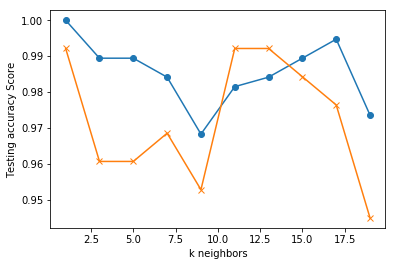

In [29]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.969


In [33]:
# save the model to disk
filename = 'Model/finalized_smartway_model_KN.sav'
pickle.dump(knn, open(filename, 'wb'))

In [34]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.968503937007874


In [35]:
df = pd.read_csv('Resources/encoded_output.csv')
new_df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)


In [36]:

newX = new_df.drop('smartway', axis=1)
newy = new_df['smartway']
print(newy)

0    1
1    2
2    1
3    0
4    2
Name: smartway, dtype: int64


In [37]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(newy)
print(newX)

   Resale-Cat  fuel_type  vehicle_class  trans  drive  smog_rating  city_mpg  \
0           1          1              0      3      1            6      16.0   
1           1          1              3      2      0            6      28.0   
2           0          1              2      1      1            5      23.0   
3           1          0              1      0      0           10     125.0   
4           1          2              0      3      1            3      43.5   

   hwy_mpg  cmb_mpg  Greenhouse_gas_score  comb_CO2  Sales_2016  Sales_2017  \
0     25.0        1                     4       459       12071        8731   
1     34.0        2                     7       295       14380       11467   
2     25.0        2                     5       375      180991      179188   
3    100.0        0                    10         0       13251       10458   
4     48.5        2                     9       214       12071        8731   

   Sales_2018  
0        7909  
1        491

In [38]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(newX, newy)

In [39]:
print(result)

0.8


In [40]:
ynew = loaded_model.predict(newX)

In [41]:
print (ynew)

[1 2 1 0 1]
